- insert + heapify
- extract max min: remove and return
- peek: return
- heapify: arrayo -> heap

advantages:
- efficient storage (no need for extra memory for pointers as in trees).
- easy access to parent and child nodes via index calculations.

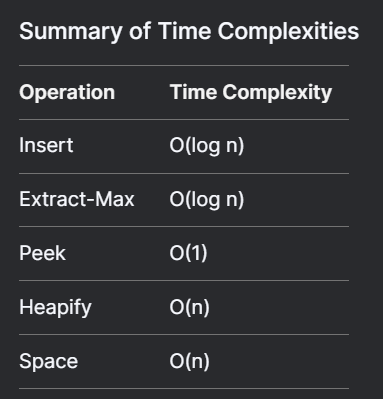

In [12]:
class MaxHeap:
    def __init__(self):
        self.heap = []


    # 1- helper functions
    def parent(self, i):
        return (i - 1) // 2

    def left_child(self, i):
        return 2 * i + 1

    def right_child(self, i):
        return 2 * i + 2
    
    def swap(self, i, j):
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

    # 2- operations
    # insert
    def insert(self, value):
        self.heap.append(value)  # add the new node to the end
        self.sift_up(len(self.heap) - 1)  # update heap

    def sift_up(self, i):
        while i > 0 and self.heap[self.parent(i)] < self.heap[i]:
            self.swap(i, self.parent(i))
            i = self.parent(i)

    # return max and remove
    def extract_max(self):
        if not self.heap:
            raise IndexError("[ERROR] Extract from an empty heap")

        max_value = self.heap[0]  # max = root
        self.heap[0] = self.heap[-1]  # move last to root
        self.heap.pop()  # remove last element (already in root)
        self.sift_down(0)  # heapify
        return max_value
    
    def sift_down(self, i):
        max_index = i
        left = self.left_child(i)
        right = self.right_child(i)

        # compare with left child
        if left < len(self.heap) and self.heap[left] > self.heap[max_index]:
            max_index = left        # if L is bigger

        # compare with right child
        if right < len(self.heap) and self.heap[right] > self.heap[max_index]:
            max_index = right       # if R is bigger

        # if the max index has changed, swap and continue sifting down
        if max_index != i:
            self.swap(i, max_index)
            self.sift_down(max_index)

    def peek(self):
        if not self.heap:
            raise IndexError("[ERROR] Peek from an empty heap")
        return self.heap[0]

    def heapify(self, array):
        self.heap = array.copy()

        # start from the last non-leaf node and sift down each node
        last_parent_node = len(self.heap) // 2 - 1
        for i in range(last_parent_node, -1, -1):
            self.sift_down(i)
    
    def __str__(self):
        return str(self.heap)

    
if __name__ == "__main__":
    heap = MaxHeap()

    heap.insert(10)
    heap.insert(20)
    heap.insert(15)
    heap.insert(30)
    heap.insert(5)

    print("Heap after insertions:", heap)  # [30, 20, 15, 10, 5]

    print("Peek max:", heap.peek())  # 30

    print("Extract max:", heap.extract_max())  # 30
    print("Heap after extraction:", heap)  # [20, 10, 15, 5]

    


Heap after insertions: [30, 20, 15, 10, 5]
Peek max: 30
Extract max: 30
Heap after extraction: [20, 10, 15, 5]


In [13]:
heap.heapify([3, 9, 2, 1, 4, 5])
print("Heap after heapify:", heap)  # [9, 4, 5, 1, 3, 2]

Heap after heapify: [9, 4, 5, 1, 3, 2]


- complete binary tree:
- - 1-all levels are filled
- - 2-the last level is filled L to R